In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nba = pd.read_csv("/content/drive/MyDrive/Projects/shot_logs.csv")
df = nba.copy()
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,...,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,...,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,...,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,...,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,...,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,...,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GAME_ID                     128069 non-null  int64  
 1   MATCHUP                     128069 non-null  object 
 2   LOCATION                    128069 non-null  object 
 3   W                           128069 non-null  object 
 4   FINAL_MARGIN                128069 non-null  int64  
 5   SHOT_NUMBER                 128069 non-null  int64  
 6   PERIOD                      128069 non-null  int64  
 7   GAME_CLOCK                  128069 non-null  object 
 8   SHOT_CLOCK                  122502 non-null  float64
 9   DRIBBLES                    128069 non-null  int64  
 10  TOUCH_TIME                  128069 non-null  float64
 11  SHOT_DIST                   128069 non-null  float64
 12  PTS_TYPE                    128069 non-null  int64  
 13  SHOT_RESULT   

In [ ]:
df.SHOT_CLOCK = df.SHOT_CLOCK.fillna(df.SHOT_CLOCK.mean())

In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME<0])

312

In [ ]:
df.TOUCH_TIME[df.TOUCH_TIME<0] = df.TOUCH_TIME.mean()

<ipython-input-7-c1c1002dfccf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TOUCH_TIME[df.TOUCH_TIME<0] = df.TOUCH_TIME.mean()


In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME<0])

0

In [ ]:
len(df.TOUCH_TIME[df.TOUCH_TIME>24.0])

4

In [ ]:
df.TOUCH_TIME[df.TOUCH_TIME>24.0] = 24

<ipython-input-10-311d7ed9d614>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.TOUCH_TIME[df.TOUCH_TIME>24.0] = 24


In [ ]:
df.LOCATION = df.LOCATION.map({"H":1,"A":0})
df.W = df.W.map({"W":1,"L":0})
df.PTS_TYPE = df.PTS_TYPE.map({2:0,3:1})
df.SHOT_RESULT = df.SHOT_RESULT.map({"made":1,"missed":0})

In [ ]:
df = df.rename(columns={"LOCATION":"HOME_AWAY","PTS_TYPE":"3PTS_SHOT","player_name":"PLAYER_NAME","player_id":"PLAYER_ID"})

In [ ]:
df.GAME_CLOCK = df.GAME_CLOCK.apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))

In [ ]:
df = df.drop(columns=["GAME_ID",
                          "MATCHUP",
                          "W",
                          "PLAYER_NAME",
                          "SHOT_NUMBER",
                          "CLOSEST_DEFENDER",
                          "CLOSEST_DEFENDER_PLAYER_ID",
                          "FGM",
                          "PTS",
                          "PLAYER_ID"], axis=1)

In [ ]:
X1 = df[["HOME_AWAY",	"FINAL_MARGIN",	"PERIOD",	"GAME_CLOCK",	"SHOT_CLOCK",	"DRIBBLES",	"TOUCH_TIME",	"SHOT_DIST", "3PTS_SHOT",	"CLOSE_DEF_DIST"]]
Y1 = df['SHOT_RESULT']

In [ ]:
X1_Train, X1_Test, Y1_Train, Y1_Test = train_test_split(X1, Y1, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X1_Train_scaled = scaler.fit_transform(X1_Train)
X1_Test_scaled = scaler.transform(X1_Test)

In [ ]:
# LOGISTIC REGRESSION WITHOUT REGULARIZATION ON ALL FEATURES

In [ ]:
%%time
Log_Reg1 = LogisticRegression()
Log_Reg1.fit(X1_Train_scaled, Y1_Train)

In [ ]:
Y1_Pred = Log_Reg1.predict(X1_Test_scaled)

In [ ]:
Accuracy = accuracy_score(Y1_Test, Y1_Pred)
Confusion_Matrix = confusion_matrix(Y1_Test, Y1_Pred)
Classification_Report = classification_report(Y1_Test, Y1_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

In [ ]:
# LOGISTIC REGRESSION WITHOUT REGULARIZATION ON TOP 5 FEATURES OF XGBOOST PLOT IMPORTANCE

In [ ]:
X2 = df[["FINAL_MARGIN",	"SHOT_CLOCK",	"TOUCH_TIME",	"SHOT_DIST",	"CLOSE_DEF_DIST"]]
Y2 = df['SHOT_RESULT']

In [ ]:
X2_Train, X2_Test, Y2_Train, Y2_Test = train_test_split(X2, Y2, test_size=0.2)

In [ ]:
scaler = StandardScaler()
X2_Train_scaled = scaler.fit_transform(X2_Train)
X2_Test_scaled = scaler.transform(X2_Test)

In [ ]:
%%time
Log_Reg2 = LogisticRegression()
Log_Reg2.fit(X2_Train_scaled, Y2_Train)

In [ ]:
Y2_Pred = Log_Reg2.predict(X2_Test_scaled)

In [ ]:
Accuracy = accuracy_score(Y2_Test, Y2_Pred)
Confusion_Matrix = confusion_matrix(Y2_Test, Y2_Pred)
Classification_Report = classification_report(Y2_Test, Y2_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

In [ ]:
# LOGISTIC REGRESSION WITH L2 REGULARIZATION ON ALL FEATURES

In [ ]:
%%time
Log_Reg1L2 = LogisticRegression(penalty='l2')
Log_Reg1L2.fit(X1_Train_scaled, Y1_Train)

In [ ]:
Y1L2_Pred = Log_Reg1L2.predict(X1_Test_scaled)

In [ ]:
Accuracy = accuracy_score(Y1_Test, Y1L2_Pred)
Confusion_Matrix = confusion_matrix(Y1_Test, Y1L2_Pred)
Classification_Report = classification_report(Y1_Test, Y1L2_Pred)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

In [ ]:
# LOGISTIC REGRESSION WITH L2 REGULARIZATION ON TOP 5 FEATURES OF XGBOOST PLOT IMPORTANCE

In [ ]:
%%time
Log_Reg2L2 = LogisticRegression(penalty='l2')
Log_Reg2L2.fit(X2_Train_scaled, Y1_Train)

In [ ]:
Y2L2_Pred = Log_Reg2L2.predict(X2_Test_scaled)

In [ ]:
Accuracy = accuracy_score(Y2_Test, Y2L2_Pred)
Confusion_Matrix = confusion_matrix(Y2_Test, Y2L2_Pred)
Classification_Report = classification_report(Y2_Test, Y2L2_Pred, zero_division=1)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

In [ ]:
# NEURAL NETWORK AHEAD

In [ ]:
# NEURAL NETWORK WITHOUT REGULARIZATION

In [ ]:
model1 = Sequential()
model1.add(Dense(64, input_dim=X1_Train_scaled.shape[1], activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [ ]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
nn1 = model1.fit(X1_Train_scaled, Y1_Train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1281/1281 [==============================] - 9s 5ms/step - loss: 0.6565 - accuracy: 0.6097 - val_loss: 0.6530 - val_accuracy: 0.6166
Epoch 2/10
1281/1281 [==============================] - 6s 5ms/step - loss: 0.6514 - accuracy: 0.6167 - val_loss: 0.6517 - val_accuracy: 0.6174
Epoch 3/10
1281/1281 [==============================] - 5s 4ms/step - loss: 0.6507 - accuracy: 0.6175 - val_loss: 0.6525 - val_accuracy: 0.6166
Epoch 4/10
1281/1281 [==============================] - 6s 5ms/step - loss: 0.6500 - accuracy: 0.6183 - val_loss: 0.6521 - val_accuracy: 0.6169
Epoch 5/10
1281/1281 [==============================] - 6s 5ms/step - loss: 0.6496 - accuracy: 0.6186 - val_loss: 0.6513 - val_accuracy: 0.6177
Epoch 6/10
1281/1281 [==============================] - 6s 4ms/step - loss: 0.6489 - accuracy: 0.6195 - val_loss: 0.6511 - val_accuracy: 0.6187
Epoch 7/10
1281/1281 [==============================] - 7s 5ms/step - loss: 0.6482 - accuracy: 0.6199 - val_loss: 0.6514 - val_accuracy:

In [ ]:
Y1_Pred_prob = model1.predict(X1_Test_scaled)

Y1_Pred_classes = (Y1_Pred_prob > 0.5).astype(int)

Accuracy = accuracy_score(Y1_Test, Y1_Pred_classes)
Confusion_Matrix = confusion_matrix(Y1_Test, Y1_Pred_classes)
Classification_Report = classification_report(Y1_Test, Y1_Pred_classes, zero_division=1)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

801/801 [==============================] - 2s 2ms/step
Accuracy: 0.6173576950105412
Confusion Matrix:
[[11225  2743]
 [ 7058  4588]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.80      0.70     13968
           1       0.63      0.39      0.48     11646

    accuracy                           0.62     25614
   macro avg       0.62      0.60      0.59     25614
weighted avg       0.62      0.62      0.60     25614



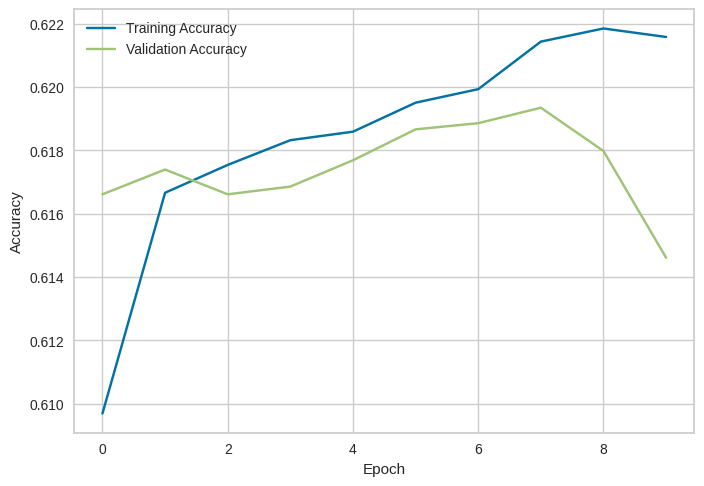

In [ ]:
plt.plot(nn1.history['accuracy'], label='Training Accuracy')
plt.plot(nn1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# NN WITH L2 REGULARIZATION

In [ ]:
model2 = Sequential()
model2.add(Dense(64, input_dim=X1_Train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model2.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
nn2 = model2.fit(X1_Train_scaled, Y1_Train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1281/1281 [==============================] - 7s 5ms/step - loss: 0.7552 - accuracy: 0.6072 - val_loss: 0.6726 - val_accuracy: 0.6135
Epoch 2/10
1281/1281 [==============================] - 5s 4ms/step - loss: 0.6715 - accuracy: 0.6103 - val_loss: 0.6710 - val_accuracy: 0.6141
Epoch 3/10
1281/1281 [==============================] - 5s 4ms/step - loss: 0.6700 - accuracy: 0.6105 - val_loss: 0.6726 - val_accuracy: 0.5968
Epoch 4/10
1281/1281 [==============================] - 6s 5ms/step - loss: 0.6690 - accuracy: 0.6089 - val_loss: 0.6707 - val_accuracy: 0.6023
Epoch 5/10
1281/1281 [==============================] - 5s 4ms/step - loss: 0.6680 - accuracy: 0.6122 - val_loss: 0.6676 - val_accuracy: 0.6090
Epoch 6/10
1281/1281 [==============================] - 6s 5ms/step - loss: 0.6674 - accuracy: 0.6121 - val_loss: 0.6697 - val_accuracy: 0.6168
Epoch 7/10
1281/1281 [==============================] - 5s 4ms/step - loss: 0.6664 - accuracy: 0.6134 - val_loss: 0.6659 - val_accuracy:

In [ ]:
Y1_Pred_prob = model2.predict(X1_Test_scaled)

Y1_Pred_classes = (Y1_Pred_prob > 0.5).astype(int)

Accuracy = accuracy_score(Y1_Test, Y1_Pred_classes)
Confusion_Matrix = confusion_matrix(Y1_Test, Y1_Pred_classes)
Classification_Report = classification_report(Y1_Test, Y1_Pred_classes, zero_division=1)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

801/801 [==============================] - 2s 2ms/step
Accuracy: 0.613687826969626
Confusion Matrix:
[[10691  3340]
 [ 6555  5028]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.76      0.68     14031
           1       0.60      0.43      0.50     11583

    accuracy                           0.61     25614
   macro avg       0.61      0.60      0.59     25614
weighted avg       0.61      0.61      0.60     25614



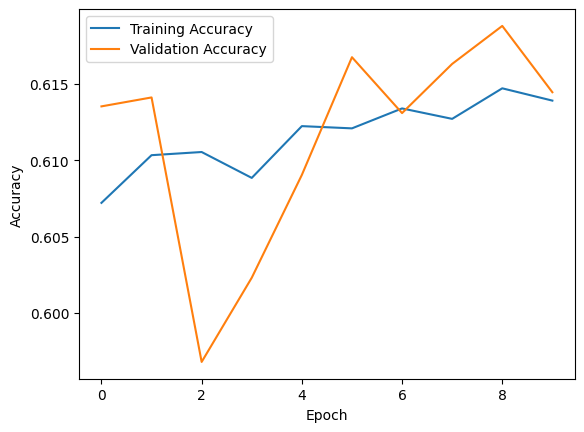

In [ ]:
plt.plot(nn2.history['accuracy'], label='Training Accuracy')
plt.plot(nn2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# NN WITH DROPOUT REGULARIZATION

In [ ]:
model3 = Sequential()
model3.add(Dense(64, input_dim=X1_Train_scaled.shape[1], activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(1, activation='sigmoid'))


In [ ]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
%%time
nn3 = model3.fit(X1_Train_scaled, Y1_Train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
1281/1281 [==============================] - 8s 4ms/step - loss: 0.6653 - accuracy: 0.5997 - val_loss: 0.6556 - val_accuracy: 0.6168
Epoch 2/10
1281/1281 [==============================] - 7s 5ms/step - loss: 0.6567 - accuracy: 0.6130 - val_loss: 0.6528 - val_accuracy: 0.6179
Epoch 3/10
1281/1281 [==============================] - 6s 4ms/step - loss: 0.6552 - accuracy: 0.6151 - val_loss: 0.6531 - val_accuracy: 0.6177
Epoch 4/10
1281/1281 [==============================] - 7s 5ms/step - loss: 0.6549 - accuracy: 0.6160 - val_loss: 0.6528 - val_accuracy: 0.6173
Epoch 5/10
1281/1281 [==============================] - 6s 4ms/step - loss: 0.6533 - accuracy: 0.6167 - val_loss: 0.6521 - val_accuracy: 0.6183
Epoch 6/10
1281/1281 [==============================] - 7s 5ms/step - loss: 0.6526 - accuracy: 0.6166 - val_loss: 0.6511 - val_accuracy: 0.6195
Epoch 7/10
1281/1281 [==============================] - 6s 5ms/step - loss: 0.6527 - accuracy: 0.6173 - val_loss: 0.6521 - val_accuracy:

In [ ]:
Y1_Pred_prob = model3.predict(X1_Test_scaled)

Y1_Pred_classes = (Y1_Pred_prob > 0.5).astype(int)

Accuracy = accuracy_score(Y1_Test, Y1_Pred_classes)
Confusion_Matrix = confusion_matrix(Y1_Test, Y1_Pred_classes)
Classification_Report = classification_report(Y1_Test, Y1_Pred_classes, zero_division=1)

print(f'Accuracy: {Accuracy}')
print('Confusion Matrix:')
print(Confusion_Matrix)
print('Classification Report:')
print(Classification_Report)

801/801 [==============================] - 2s 2ms/step
Accuracy: 0.6208323573045991
Confusion Matrix:
[[11878  2090]
 [ 7622  4024]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.85      0.71     13968
           1       0.66      0.35      0.45     11646

    accuracy                           0.62     25614
   macro avg       0.63      0.60      0.58     25614
weighted avg       0.63      0.62      0.59     25614



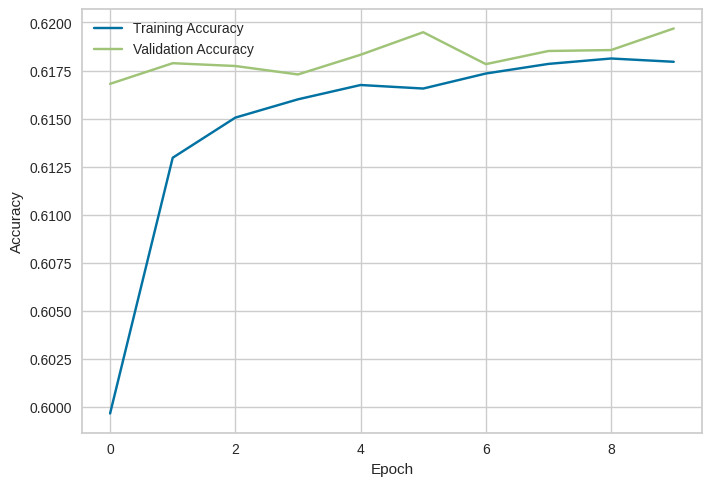

In [ ]:
plt.plot(nn3.history['accuracy'], label='Training Accuracy')
plt.plot(nn3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()